<a href="https://colab.research.google.com/github/gencross/CollatzGroup3/blob/main/MilesCollatzNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def collatz_verbose(n):
  '''
  Prints the orbit of n
  '''
  while abs(n) != 1: #check if n has reached 1 or -1
    print(n)
    if n % 2 == 0: #if n is even, divide by 2 and repeat
      n //= 2
    else: #if n is odd, do 3n+1 and repeat
      n = (3 * n + 1)
  return

In [ ]:
def collatz_iterations(n):
  '''
  Return how many iterations it takes for
  n to go to 1
  '''
  iterations = 0
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
    iterations += 1
  return iterations

In [ ]:
def collatz_check(n):
  '''
  Returns True if n passes
  the Collatz conjecture
  '''
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
  return True

In [ ]:
for i in range(2,10**5):
  if collatz_check(i) != True:
    print("Fields Medal!!!", i)
print("Check complete.")    

Check complete.


In [ ]:
def find_max_iter(n):
  '''
  Checks for the number with the longest orbit
  up to n. Returns a tuple. The first value is
  the number, the second value is the number of 
  iterations.
  '''
  max_iter = 0
  max_iter_n = 0
  for i in range(2,n+1):
    i_iter = collatz_iterations(i)
    if i_iter > max_iter:
      max_iter = i_iter
      max_iter_n = i
  return max_iter_n, max_iter

In [ ]:
find_max_iter(10**5)

(77031, 221)

In [ ]:
#collatz_verbose(77031)

In [ ]:
def better_check(n):
  for i in range(3,n+1,2):
    c = i
    while c >= i:
      if c % 2 == 0:
        c //= 2
      if c % 2 == 1:
        c = (3 * c + 1) // 2
  print("Verified up to {}".format(n))


In [ ]:
#better_check(10**9)

Verified up to 1000000000


In [158]:
def sigma(n):
  '''
  Finds and returns the "dropping time" of n.
  This is the number of 3n+1 loops that it takes
  for n to become less than where it started.
  '''
  i = n # i will be the variable that changes
  loops = 0 # track the dropping time here
  while i >= n: # stop when i < n
    if i % 2 == 0:
      i //= 2
      loops += 1
    else:
      i = (3 * i + 1) // 2
      loops += 2 # We can combine 2 steps in to one here since 3i+1 is always even
  return loops

In [ ]:
def best_sigmas(n):
  '''
  Creates and returns a list all positive ints
  less than or equal to n whose dropping time
  is greater than the dropping times of all
  smaller positive ints. Also returns the dropping
  times.
  '''
  int_list = [2]
  sigma_list = [1] # initialize at 2 and start checking at 3
  for i in range(3,n+1,2):
    sig_i = sigma(i) # save this as a variable so we don't have to run it twice
    if sig_i > sigma_list[-1]:
      int_list.append(i)
      sigma_list.append(sig_i)
  return int_list,sigma_list

In [ ]:
best_sigmas_list = best_sigmas(10**7)
print(best_sigmas_list)

([2, 3, 7, 27, 703, 10087, 35655, 270271, 362343, 381727, 626331, 1027431, 1126015, 8088063, 13421671, 20638335, 26716671, 56924955, 63728127], [1, 6, 11, 96, 132, 171, 220, 267, 269, 282, 287, 298, 365, 401, 468, 476, 486, 502, 613])


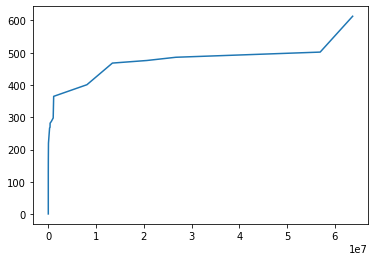

In [ ]:
import matplotlib.pyplot as plt
plt.plot(best_sigmas_list[0],best_sigmas_list[1])

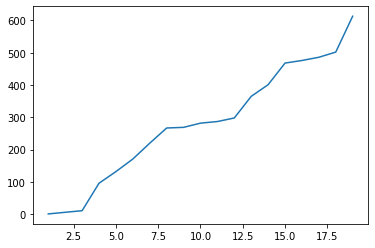

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(best_sigmas_list[0])+1)),best_sigmas_list[1])

In [195]:
def sigma_a_mod_b(a,b):
  '''
  returns a list of all of the sigmas
  for integers congruent to a mod b
  up to 10**6
  '''
  sigma_list = []
  for i in range(a,10**6,b):
    sigma_list.append(sigma(i))
  return sigma_list

In [156]:
#sigma_a_mod_b(1,4)[0:100]

In [117]:
def histogram_plot(l):
  '''
  plot a histogram from the entries of l
  '''
  import matplotlib.pyplot as plt
  index = []
  data = []
  for i in l:
    index.append(i[0])
    data.append(i[1])
  plt.plot(index,data)

In [147]:
from statistics import mean
def average_sigma(a,n):
  average_sigma_list = []
  for i in range(1,n):
    k = mean(sigma_a_mod_b(a,i))
    average_sigma_list.append((i,k))
  return average_sigma_list

In [218]:
avg_list = average_sigma(47,300)

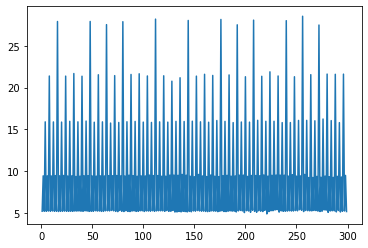

In [220]:
histogram_plot(avg_list)

In [219]:
avg_list

[(1, 5.226184630677642),
 (2, 9.452360808597195),
 (3, 5.224014304658014),
 (4, 15.904695806615491),
 (5, 5.219084858818647),
 (6, 9.448028609316028),
 (7, 5.242168413241769),
 (8, 21.381255250210007),
 (9, 5.226828434107969),
 (10, 9.438127525101004),
 (11, 5.250063252846378),
 (12, 15.895979839193568),
 (13, 5.215353614144566),
 (14, 9.484277433987623),
 (15, 5.225834033361335),
 (16, 27.89572466318922),
 (17, 5.190085173662467),
 (18, 9.453656868215939),
 (19, 5.207999239977199),
 (20, 15.876255050202008),
 (21, 5.229077850347565),
 (22, 9.500033001122038),
 (23, 5.238907928329922),
 (24, 21.370142805712227),
 (25, 5.218605465136628),
 (26, 9.430707228289132),
 (27, 5.208796846311697),
 (28, 15.968554867975246),
 (29, 5.225943970767357),
 (30, 9.45166806672267),
 (31, 5.218557212388009),
 (32, 21.677941694134212),
 (33, 5.241106197610719),
 (34, 9.3800278807249),
 (35, 5.237548563228448),
 (36, 15.907081398279152),
 (37, 5.246207355879523),
 (38, 9.415998479954398),
 (39, 5.22698907